In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Model with reduced size images

In [2]:
data_train_path = '../data/processed/train_data_resized_without_masks.npz'
data_test_path = '../data/processed/test_data_resized_without_masks.npz'


if os.path.exists(data_train_path):
    data_train = np.load(data_train_path, allow_pickle=True)
else:
    print('No train data input file.')
    exit()

if os.path.exists(data_test_path):
    data_test = np.load(data_test_path, allow_pickle=True)
else:
    print('No test data input file.')
    exit()


In [4]:
X_train = data_train['X_train']
y_train = data_train['y_train']
X_test = data_test['X_test']
y_test = data_test['y_test']
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

35059
35059
4233
4233


In [7]:
print(y_train.dtype)
y_train = y_train.astype(int)

int32


In [8]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8291991495393338


In [10]:
clf.score(X_test, y_test)

0.8291991495393338

In [11]:
print(clf.predict_proba(X_test))

[[0.02 0.   0.01 0.97]
 [0.13 0.3  0.57 0.  ]
 [0.08 0.11 0.81 0.  ]
 ...
 [0.1  0.29 0.61 0.  ]
 [0.12 0.21 0.67 0.  ]
 [0.45 0.23 0.3  0.02]]


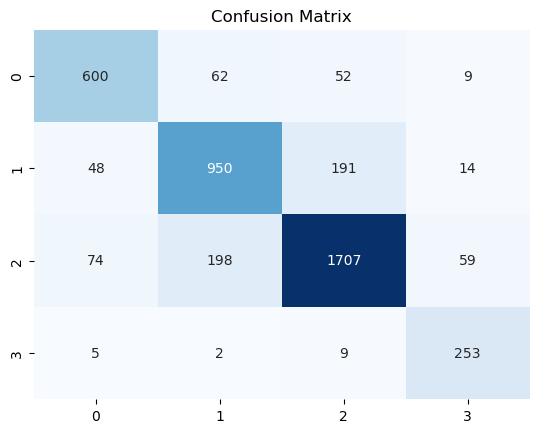

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.show()

In [ ]:

# Hyperparameter tuning using GridSearchCV
# Note: This is a computationally expensive operation and may take a long time to run.
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [ ]:
from joblib import dump, load
dump(grid_search, '../models/grid_search_model.joblib', compress='gzip')

['grid_search_model.joblib']

In [16]:
best_params = grid_search.best_params_ 
print("Best parameters found: ", best_params)
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score) 

Best parameters found:  {'class_weight': 'balanced', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.8406127980473902


In [ ]:
# try again with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred))

Accuracy with best parameters: 0.8197495865816206


['best_rf_model.joblib']

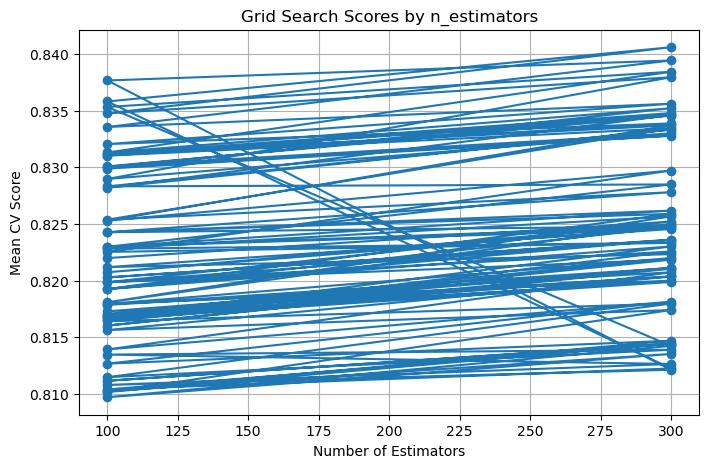

In [18]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 5))
plt.plot(results_df['param_n_estimators'], results_df['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Score')
plt.title('Grid Search Scores by n_estimators')
plt.grid(True)
plt.show()

In [ ]:
#from joblib import dump, load
#grid_search = load('../models/grid_search_model.joblib')